In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = r"../../output_data/cities.csv"
output_graphs = r"../../output_data/"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
data = {"ID": [], 
        "City Name": [], 
        "Country": [],
        "Date": [],
        "Lat" : [], 
        "Lng": [], 
        "Max Temp": [], 
        "Humidity": [], 
        "Wind Speed": [], 
        "Cloud": []}

In [5]:
rec = 0
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        data['Lat'].append(response['coord']['lat'])
        data['Lng'].append(response['coord']['lon'])
        data['Max Temp'].append(response['main']['temp_max'])
        data['Humidity'].append(response['main']['humidity'])
        data['Wind Speed'].append(response['wind']['speed'])
        data['Cloud'].append(response['clouds']['all'])
        data['Country'].append(response['sys']['country'])
        data['ID'].append(response['id'])
        data['City Name'].append(response['name'])
        data['Date'].append(response['dt'])
        rec +=1
        print(f"Record {rec} | Processed for {city}.")
    else:
        print("City cannot be found.")
print("Complete.")

Record 1 | Processed for lufilufi.
Record 2 | Processed for mataura.
Record 3 | Processed for pevek.
Record 4 | Processed for bonavista.
Record 5 | Processed for sur.
Record 6 | Processed for ushuaia.
City cannot be found.
Record 7 | Processed for cidreira.
Record 8 | Processed for srednekolymsk.
Record 9 | Processed for upernavik.
Record 10 | Processed for cape town.
Record 11 | Processed for busselton.
Record 12 | Processed for albany.
Record 13 | Processed for fortuna.
Record 14 | Processed for cayenne.
City cannot be found.
Record 15 | Processed for tiksi.
Record 16 | Processed for ovsyanka.
Record 17 | Processed for san quintin.
Record 18 | Processed for jamestown.
Record 19 | Processed for cabinda.
Record 20 | Processed for turaiyur.
Record 21 | Processed for punta arenas.
Record 22 | Processed for butaritari.
Record 23 | Processed for tecolutla.
City cannot be found.
Record 24 | Processed for bengkulu.
City cannot be found.
City cannot be found.
Record 25 | Processed for haveloc

Record 211 | Processed for vardo.
Record 212 | Processed for bertoua.
Record 213 | Processed for malatya.
Record 214 | Processed for lebu.
Record 215 | Processed for vostok.
Record 216 | Processed for salalah.
Record 217 | Processed for iqaluit.
Record 218 | Processed for tilichiki.
Record 219 | Processed for inhambane.
Record 220 | Processed for mandurah.
City cannot be found.
Record 221 | Processed for constitucion.
City cannot be found.
Record 222 | Processed for matagami.
Record 223 | Processed for kalmunai.
Record 224 | Processed for ponta delgada.
Record 225 | Processed for poum.
Record 226 | Processed for maracacume.
Record 227 | Processed for yining.
Record 228 | Processed for kahului.
City cannot be found.
Record 229 | Processed for kalabo.
Record 230 | Processed for longyearbyen.
Record 231 | Processed for port lincoln.
Record 232 | Processed for chicama.
Record 233 | Processed for sergiyevsk.
Record 234 | Processed for solnechnyy.
Record 235 | Processed for flinders.
Record 

Record 421 | Processed for san luis.
Record 422 | Processed for ajdabiya.
Record 423 | Processed for carndonagh.
City cannot be found.
Record 424 | Processed for balikpapan.
Record 425 | Processed for bolitoc.
City cannot be found.
Record 426 | Processed for ust-maya.
Record 427 | Processed for muana.
Record 428 | Processed for fomboni.
City cannot be found.
Record 429 | Processed for pathein.
Record 430 | Processed for ati.
Record 431 | Processed for zykovo.
Record 432 | Processed for baisha.
Record 433 | Processed for tautira.
Record 434 | Processed for laguna.
Record 435 | Processed for longonjo.
Record 436 | Processed for safford.
Record 437 | Processed for el tigre.
Record 438 | Processed for umm kaddadah.
Record 439 | Processed for japura.
Record 440 | Processed for ulaangom.
Record 441 | Processed for mae hong son.
Record 442 | Processed for katherine.
Record 443 | Processed for kyra.
Record 444 | Processed for dharmadam.
Record 445 | Processed for sinazongwe.
Record 446 | Proce

In [6]:
weather_df = pd.DataFrame(data)
weather_df.head()

,ID,City Name,Country,Date,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloud
0,4035249,Lufilufi,WS,1591216878,-13.87,-171.60,28.00,83,10.23,75
1,6201424,Mataura,NZ,1591216878,-46.19,168.86,6.72,92,3.35,100
2,2122090,Pevek,RU,1591216878,69.70,170.31,4.22,76,1.54,68
3,5905393,Bonavista,CA,1591216879,48.65,-53.11,11.67,64,4.47,32
4,286245,Sur,OM,1591216879,22.57,59.53,33.82,39,2.31,0


In [7]:
# Export data to a CSV file
weather_df.to_csv(output_file, index=False)

#### Latitude vs. Temperature Plot

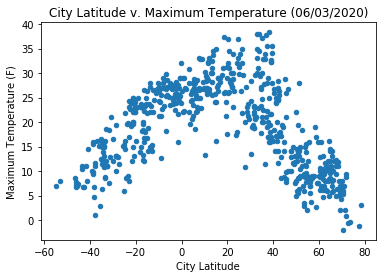

In [27]:
ax = weather_df.plot.scatter(x="Lat", y="Max Temp", title="City Latitude v. Maximum Temperature (06/03/2020)")
ax.set_xlabel("City Latitude")
ax.set_ylabel("Maximum Temperature (F)")
plt.savefig(output_graphs + 'temp.png')

#### Latitude vs. Humidity Plot

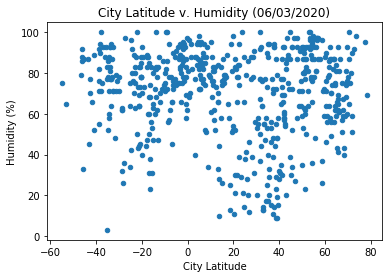

In [28]:
ax = weather_df.plot.scatter(x="Lat", y="Humidity", title="City Latitude v. Humidity (06/03/2020)")
ax.set_xlabel("City Latitude")
ax.set_ylabel("Humidity (%)")
plt.savefig(output_graphs + 'humidity.png')

#### Latitude vs. Cloudiness Plot

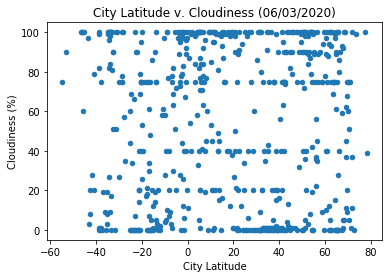

In [29]:
ax = weather_df.plot.scatter(x="Lat", y="Cloud", title="City Latitude v. Cloudiness (06/03/2020)")
ax.set_xlabel("City Latitude")
ax.set_ylabel("Cloudiness (%)")
plt.savefig(output_graphs + 'cloud.png')

#### Latitude vs. Wind Speed Plot

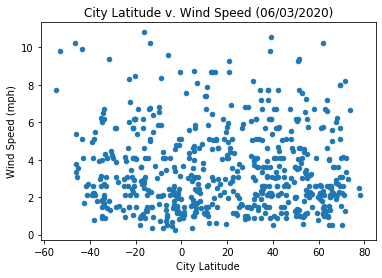

In [30]:
ax = weather_df.plot.scatter(x="Lat", y="Wind Speed", title="City Latitude v. Wind Speed (06/03/2020)")
ax.set_xlabel("City Latitude")
ax.set_ylabel("Wind Speed (mph)")
plt.savefig(output_graphs + 'wind.png')

In [ ]:
## Observation 1: Unsurprisingly, temperature generally increases the closer you get to the equator. Temperature across the data and varying latitudes follows a rough bell curve and you can reliabily expect a certain temperature depending on where you are.
## Observation 2: Wind speed appears to have little to no correlation with latitude. There are places throughout the range of latitudes wtih high wind speeds, and low wind speeds. Most fall somewhere between 2 and 6, which is just about average.
## Observation 3: It is possible that the measure of cloudiness causes this, but the data seems to suggest that most cities reporting cloudiness have quite a bit (>80%). Those that aren't tend to have no cloud cover at all. The trend in the data itself is interesting and begs quite a few questions that could be investigated further.